In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import *

%matplotlib inline

In [24]:
results = pd.read_csv("../hyperparameter_tuning/benchmark_results_summary_v15.tsv",sep = "\t",index_col=(0,1))
results

(5,10)  (5,20)  (5,50)  (5,100)  \
(genes, samples) / method para- meters                                    
DeBi                      O               0.12    0.18    0.17     0.20   
                          D               0.03    0.05    0.04     0.04   
ISA2                      O               0.01    0.03    0.06     0.05   
                          D               0.01    0.05    0.08     0.06   
xMOTIFs                   O               0.00    0.01    0.30     0.41   
                          D               0.00    0.01    0.10     0.28   
Cheng & Church            O               0.00    0.01    0.02     0.08   
                          D               0.00    0.01    0.02     0.08   
Plaid                     O               0.00    0.00    0.00     0.00   
                          D               0.00    0.00    0.00     0.00   
FABIA                     O               0.00    0.02    0.22     0.54   
                          D               0.00    0.00    0.02     0.05   
COALESCE                  O               0.00    0.84    0.85     0.12   
                          D               0.00    0.61    0.81     0.11   
QUBIC                     O               0.00    0.07    0.45     0.07   
                          D               0.05    0.19    0.10     0.00   
BiBit                     O               0.00    0.00    0.01     0.02   
                          D               0.00    0.00    0.01     0.01   
DESMOND                   O               0.00    0.54    0.82     0.92   

                                        (10,10)  (10,20)  (10,50)  (10,100)  \
(genes, samples) / method para- meters                                        
DeBi                      O                0.36     0.30     0.28      0.21   
                          D                0.06     0.08     0.08      0.08   
ISA2                      O                0.06     0.12     0.16      0.14   
                          D                0.10     0.12     0.15      0.14   
xMOTIFs                   O                0.00     0.03     0.20      0.26   
                          D                0.00     0.01     0.09      0.18   
Cheng & Church            O                0.00     0.01     0.02      0.10   
                          D                0.00     0.01     0.02      0.08   
Plaid                     O                0.00     0.00     0.00      0.02   
                          D                0.00     0.00     0.00      0.00   
FABIA                     O                0.03     0.25     0.81      0.94   
                          D                0.00     0.02     0.18      0.40   
COALESCE                  O                0.60     1.00     0.98      0.25   
                          D                0.00     1.00     0.98      0.21   
QUBIC                     O                0.01     0.46     0.50      0.09   
                          D                0.07     0.09     0.05      0.00   
BiBit                     O                0.01     0.00     0.01      0.01   
                          D                0.00     0.00     0.00      0.01   
DESMOND                   O                0.12     0.75     0.91      0.90   

                                        (20,10)  (20,20)  \
(genes, samples) / method para- meters                     
DeBi                      O                0.43     0.40   
                          D                0.10     0.10   
ISA2                      O                0.22     0.31   
                          D                0.22     0.25   
xMOTIFs                   O                0.01     0.04   
                          D                0.00     0.01   
Cheng & Church            O                0.00     0.00   
                          D                0.00     0.00   
Plaid                     O                0.01     0.05   
                          D                0.00     0.00   
FABIA                     O                0.23     0.66   
                        

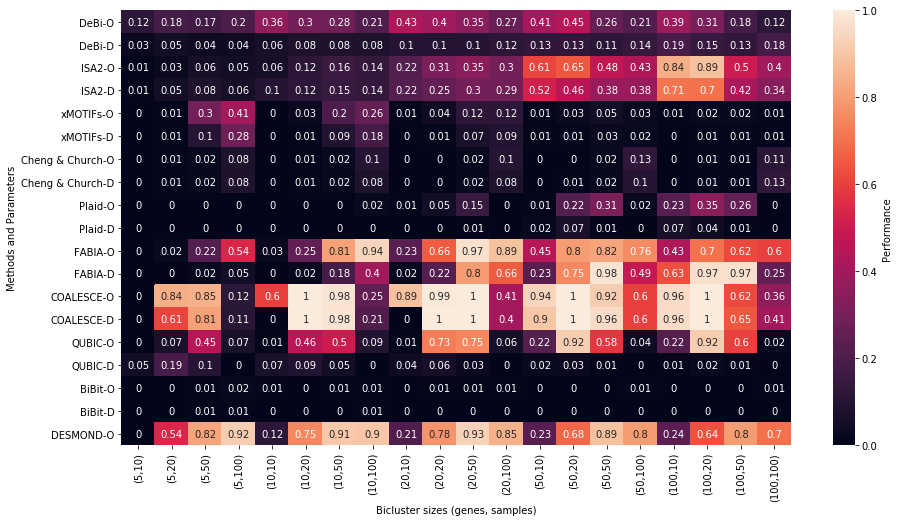

In [45]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
sns.heatmap(results.iloc[:,:-2], annot=True,ax=ax,cbar_kws={'label': 'Performance'})
tmp = ax.set_xlabel('Bicluster sizes (genes, samples)')
tmp = ax.set_ylabel('Methods and Parameters')

plt.savefig('Fig1B.Benchmark_results.svg')
plt.savefig('Fig1B.Benchmark_results.png')
plt.savefig('Fig1B.Benchmark_results.pdf')

In [44]:
summary_results = pd.read_csv("../hyperparameter_tuning/benchmark_results_summary_v15.tsv",sep = "\t")


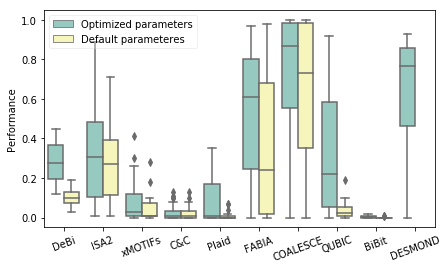

In [47]:
d  = {"D":"Default parameteres","O":"Optimized parameters"}
results_table = {}
i =0 
for g in [5,10,20,50,100]:
    for s in [10,20,50,100]:
        for row in summary_results.iterrows():
            results_table[i] = {"method":row[1]["(genes, samples) / method"],
                                "parameters": d[row[1]["para- meters"]],
                                "bicluster_size":(g,s),
                                "performance":row[1]['('+str(g)+','+str(s)+')']}
            i+=1
results_table = pd.DataFrame.from_dict(results_table).T
results_table["performance"] = results_table["performance"].astype(float)
results_table.head()

plt.figure(figsize=(7,4))
ax = sns.boxplot(x="method", y="performance", hue="parameters",
                 data=results_table.replace("Cheng & Church","C&C"), palette="Set3")
tmp = plt.legend(loc='upper left',fancybox=True, framealpha=0.3)
tmp = plt.xticks(rotation=20)
tmp = ax.set_xlabel('')
tmp = ax.set_ylabel('Performance')
plt.savefig('Fig2A.Benchmark_results.svg')
plt.savefig('Fig2A.Benchmark_results.png')
plt.savefig('Fig2A.Benchmark_results.pdf')